In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
os.chdir(r'C:\Users\63094\Downloads\hero wired\datacsv')
os.listdir();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
df=pd.read_csv('drugs.csv',index_col=0)

In [11]:
df1=pd.read_csv('daily-total-female-births-CA.csv',index_col=0)

In [12]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [13]:
df1

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [14]:
a=df['value']
b=df1['births']

<IPython.core.display.Javascript object>


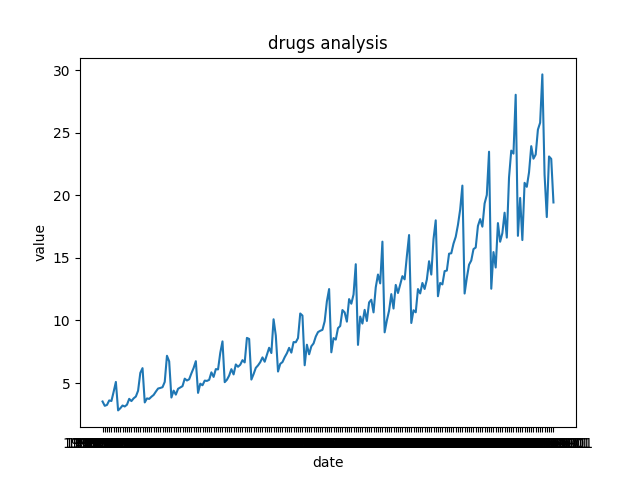

In [17]:
%matplotlib notebook
plt.plot(a)
plt.title('drugs analysis')
plt.xlabel('date')
plt.ylabel('value')
plt.show()

### It should not be constant mean and constant variance......its varying

<IPython.core.display.Javascript object>


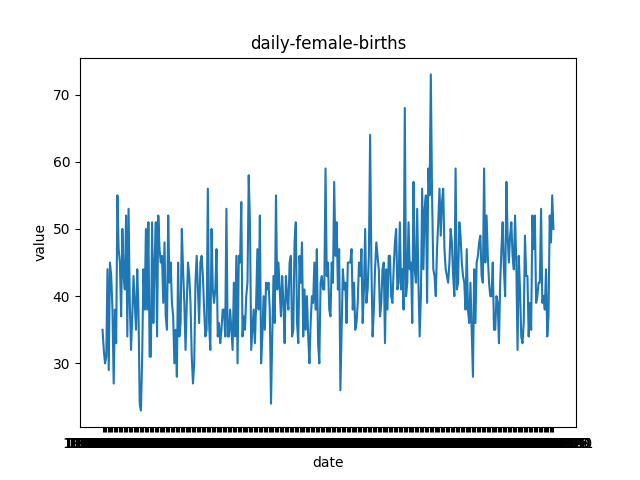

In [18]:
%matplotlib notebook
plt.plot(b)
plt.title('daily-female-births')
plt.xlabel('date')
plt.ylabel('value')
plt.show()

### In this variance and mean can be constant......

# 2nd method (A.D.F)

###  Augmented Dickey Fuller 

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
 

In [24]:
 def ar_process(lags,coefs,length):
        coefs=np.array(coefs)
        series=[np.random.normal() for i in range(lags)]
        for i in range(length):
            prev_vals=series[-lags:][::-1]
            new_val=np.sum(np.array(prev_vals)*coefs)+np.random.normal()
            series.append(new_val)
        return np.array(series)
            

In [25]:
def perform_adf_test(series):
    result=adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value:%f'% result[1])
    

<IPython.core.display.Javascript object>


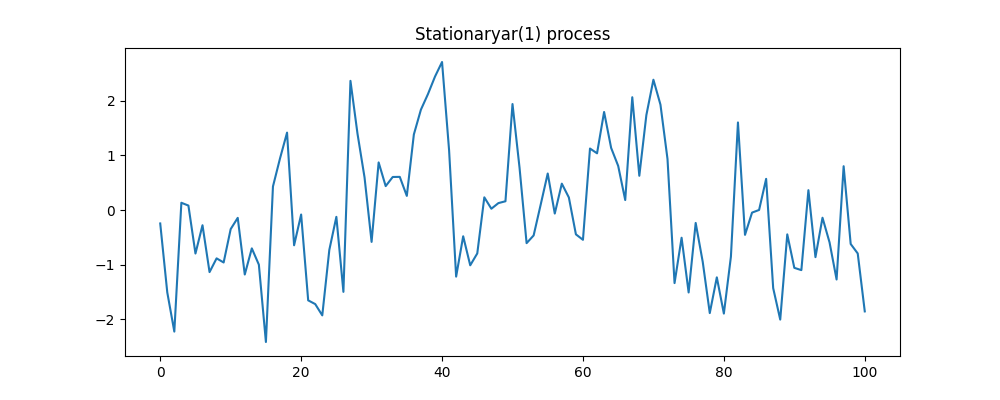

Text(0.5, 1.0, 'Stationaryar(1) process')

In [28]:
ar_1_process=ar_process(1, [.5], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title('Stationaryar(1) process')

In [29]:
perform_adf_test(ar_1_process)

ADF Statistic: -5.316050
p-value:0.000005


# stationary

<IPython.core.display.Javascript object>


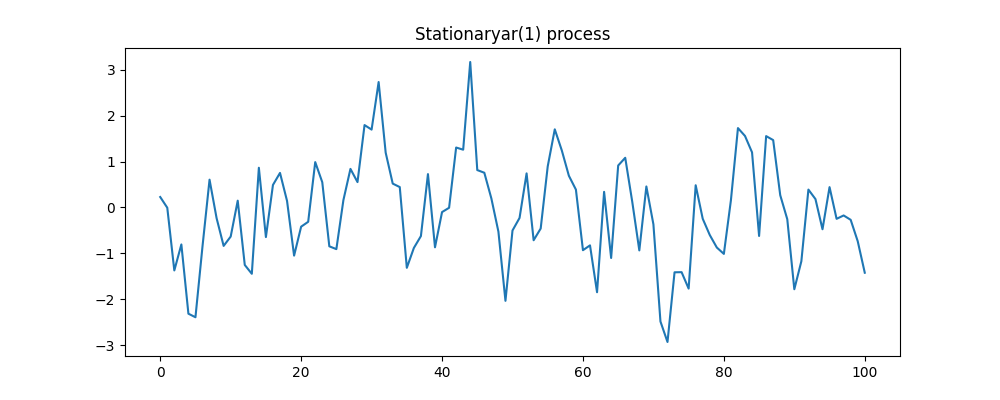

Text(0.5, 1.0, 'Stationaryar(1) process')

In [70]:
ar_2_process=ar_process(1, [.7,.3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title('Stationaryar(1) process')

In [71]:
def perform_adf_test(series):
    result=adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value:%f'% result[1])
    

In [72]:
perform_adf_test(ar_2_process)

ADF Statistic: -1.134642
p-value:0.701061


In [2]:
os.chdir(r'C:\Users\63094\Downloads\hero wired\datacsv')
os.listdir();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
df=pd.read_csv('drugs.csv',index_col=0)

<IPython.core.display.Javascript object>

In [4]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


In [5]:
from statsmodels.tsa.stattools import adfuller


<IPython.core.display.Javascript object>


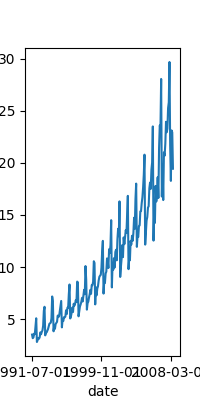

<IPython.core.display.Javascript object>

In [12]:
%matplotlib notebook
df.value.plot(figsize=(2,4))
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
adf=adfuller(df.value, autolag='AIC')

In [15]:
adf

(3.1451856893067376,
 1.0,
 15,
 188,
 {'1%': -3.465620397124192,
  '5%': -2.8770397560752436,
  '10%': -2.5750324547306476},
 549.6705685364172)

In [25]:
#p-value--->1.0
#n_lags---->15
#no.of observations--->188
#critical values--->1%,5%,10%

### we seethat p-value obtained is greather than the significance level of 0.05  and adf statistic is greather than the all of the critical values.Because of that time-series is non-stationary....

# 3rd method.(KPSS TEST)

### Kwiatkowski-Phillips-Schmidt-Shin

In [28]:
from statsmodels.tsa.stattools import kpss

In [30]:
os.listdir();

<IPython.core.display.Javascript object>

In [32]:
df=pd.read_csv('amazon_revenue_profit.csv')
df

<IPython.core.display.Javascript object>

,Quarter,Revenue,Net Income
0,3/31/2020,75452,2535
1,12/31/2019,87437,3268
2,9/30/2019,69981,2134
3,6/30/2019,63404,2625
4,3/31/2019,59700,3561
...,...,...,...
56,3/31/2006,2279,51
57,12/31/2005,2977,199
58,9/30/2005,1858,30
59,6/30/2005,1753,52


In [33]:
kpss(df['Revenue'])

C:\Users\63094\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


(0.5827432403327967,
 0.024205159969745753,
 11,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [34]:
#test stats
#p-value
#critical values
#series is not stationary

In [36]:
s=df['Revenue']
s

0     75452
1     87437
2     69981
3     63404
4     59700
      ...  
56     2279
57     2977
58     1858
59     1753
60     1902
Name: Revenue, Length: 61, dtype: int64

### How to interpret KPSS test results
The output of the KPSS test contains 4 things:

The KPSS statistic

p-value

Number of lags used by the test

Critical values